In [18]:
# 連続型の説明変数を持つモデル＝回帰

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [19]:
# ビールの売上データ
beer = pd.read_csv("./data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


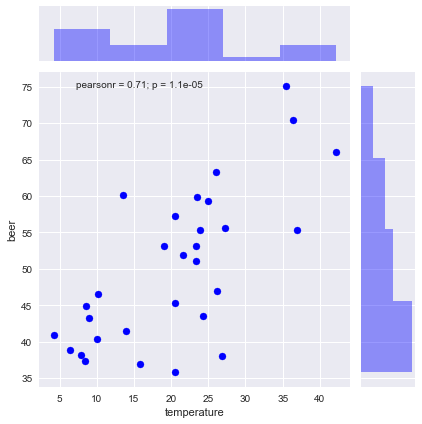

In [20]:
# 図示
sns.jointplot(x="temperature", y="beer", data=beer, color="blue")

In [24]:
# モデル化
lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit() # OLS　最小二乗法

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           1.11e-05
Time:                        18:39:00   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# AICによるモデル選択
null_model = smf.ols("beer ~ 1", data = beer).fit()

In [26]:
# NULLモデルの赤池の情報量基準　
null_model.aic

227.942

In [28]:
null_model.summary()

/Users/inoueshinichi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Fri, 17 Aug 2018   Prob (F-statistic):                nan
Time:                        18:39:17   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# 説明変数（気温）入りのAIC
lm_model = smf.ols("beer ~ temperature", data=beer).fit()
lm_model.aic

208.909

In [30]:
# AIC = -2 * (MaxLogLikelihood - # of Params)

# max対数尤度
print(lm_model.llf)

# 説明変数の数
print(lm_model.df_model)

# AIC
print(-2 * (lm_model.llf -(lm_model.df_model + 1)))

-102.4545146778772
1.0
208.9090293557544


In [31]:
# AICの推定パラメータは局外パラメータを含む定義と含まない定義がある。R言語は局外パラメータも含む


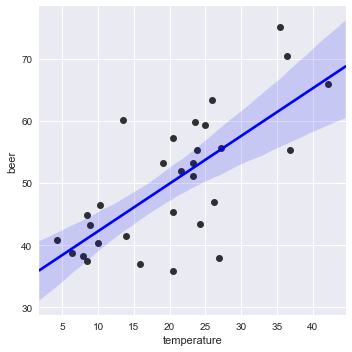

In [32]:
# seabornによる回帰直線の図示
sns.lmplot(x="temperature", y="beer", data=beer, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
# 網掛け部分は回帰直線の95%信頼区間

In [33]:
# 訓練データへの予測値の当てはめ（訓練に使った気温データのときの、ビールの売上高）

lm_model.predict() # 訓練に使ったデータの順序で表示される

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [34]:
# 気温の値を指定して、予測
lm_model.predict(pd.DataFrame({"temperature": [0]}))

0    34.610215
dtype: float64

In [35]:
# 今回のモデルは　ビールの売上〜N(b0＋b1＊気温、シグマ＾２）だった。回帰直線の予測値は正規分布における期待値「b0＋b1＊気温」と等しい
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [36]:
# 気温が20℃のときのビールの売上高の期待値を計算
lm_model.predict(pd.DataFrame({"temperature": [20]}))

0    49.918767
dtype: float64

In [37]:
0.7654 * 20 + 34.610215

49.918

In [38]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * 20

49.919

In [39]:
# 気温の誤差平方和
beer_mean = beer["temperature"].mean()
print(beer_mean)
ess = sp.sum((beer["temperature"] - beer_mean)**2)
print(ess)

20.349999999999998
2818.895


In [40]:
# 残差d
residual = beer["beer"] - (beta0 + beta1 * beer["temperature"])
print(residual[:5])

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64


In [42]:
# beta1の不偏分散 s^2 = sum(residual**2) / (n - 2)
N = len(residual)
beta1Sigma2 = sp.sum(residual ** 2) / (N - 2)
beta1Sigma2

58.057

In [43]:
# beta1の標準誤差SE(beta1) = sp.sqrt(beta1Sigma2 / sp.sum(xi - xi_mean)**2)
beta1SE = sp.sqrt(beta1Sigma2 / ess)
print(beta1SE)

0.1435112672011713


0   -5.001481
1    5.554095
2   -1.864491
dtype: float64


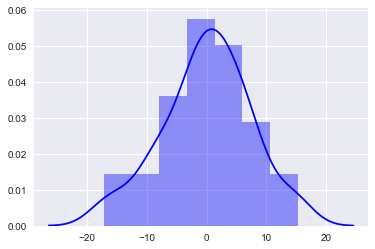

In [44]:
# モデルの評価は残差チェック。残差は平均ゼロの正規分布に従うはず
resid = lm_model.resid
print(resid.head(3))
sns.distplot(resid, color="blue")

In [45]:
# 決定係数 R^2
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict() # 訓練データxiに対してyihatが自動的に算出される
print(sp.sum((yhat - mu) ** 2) / sp.sum((y - mu) ** 2))

0.5039593230611878


In [46]:
# もっと簡単
lm_model.rsquared

0.504

In [47]:
# 決定係数は「全体の変動の大きさに占める、モデルで説明できた変動の割合」
# Rsquared = sum( (yhat - mean) ** 2 ) / ALL
# ALL = sum( (y - mean) ** 2 ) = sum( (yhat - mean) ** 2 ) + sum( residual ** 2 )
# Rsquared = 1 - sum( (residual) ** 2 ) / sum( ( y -mean) ** 2 )

all = sp.sum( (yhat - mu) ** 2 ) + sp.sum( resid ** 2 )
print(all)
all2 = sp.sum( (y - mu) ** 2 )
print(all2)

3277.1146666666727
3277.114666666666


In [48]:
Rsquared = 1 - sp.sum(resid ** 2) / sp.sum( (y - mu) ** 2)
print(Rsquared)

0.5039593230611856


In [49]:
# 自由度調整済み決定係数 Rsquared_adj
# Rsquared_adj = 1 - ( sp.sum(resid ** 2) / (N - s -1) ) / (sp.sum( (y - mean) ** 2) / (N - 1))

n = len(beer.beer)
s = 1 # 説明変数の個数
Rsquared_adj = 1 - ( sp.sum(resid ** 2) / (n - s - 1) ) / (sp.sum( (y - mu) ** 2) / (n - 1))
print(Rsquared_adj)

0.48624358459908523


In [51]:
lm_model.rsquared_adj

0.486

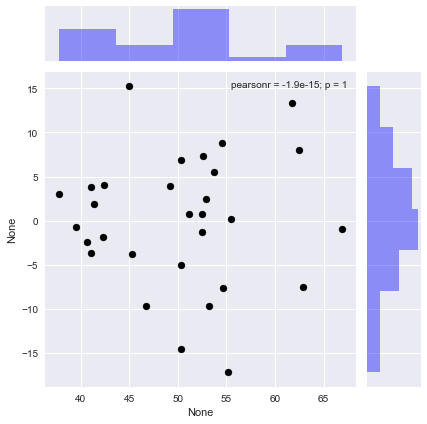

In [52]:
# x軸：ｙの推定値、　y軸：残差　の散布図
# →残差がランダムに出ているかチェック
# →平均ゼロ周りにあるか

sns.jointplot(lm_model.fittedvalues, resid, joint_kws={"color":"black"}, marginal_kws={"color":"blue"})

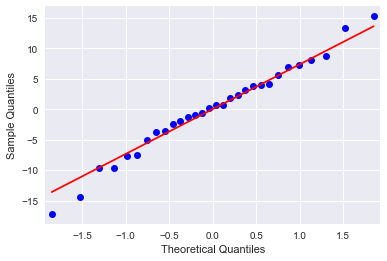

In [53]:
# Q-Qプロット
fig = sm.qqplot(resid, line="s")

In [54]:
# 自作
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [55]:
# 最小%点
# サンプルサイズ30のとき
1 / (30+1)

0.032

In [59]:
# 30サンプルすべてに対して上記の計算を行う：理論上の累積確率
nobs = len(resid_sort)
cdf = np.arange(1, nobs+1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [60]:
# 理論上の分位点は正規分布のパーセント点を使えばよい。
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

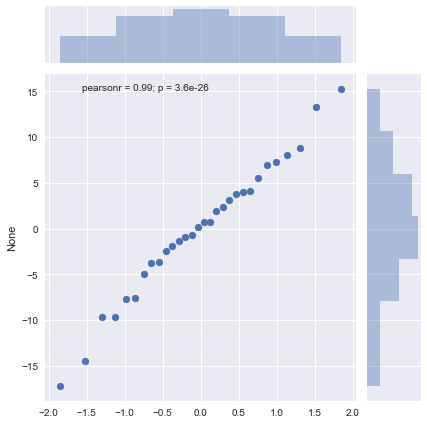

In [58]:
# 横軸に理論上の分位点(ppf)、縦軸にソートされたデータ(resid_sort)を指定して散布図をプロット(Q-Q)
sns.jointplot(x=ppf, y=resid_sort)